In [1]:
from citipy import citipy
import pandas as pd
import numpy as np
import json
import requests
import matplotlib.pyplot as plt
from config import weather_api
from pprint import pprint

# Creating the cities DataFrame

In [2]:
#Create a list of random latitudes and longitudes
cities_df = pd.DataFrame({"lat":np.random.uniform(-90,90,500), "long":np.random.uniform(-180,180,500)})

print(len(cities_df))

cities_df.head()

500


,lat,long
0,-37.092551,-81.223852
1,35.151068,86.759262
2,-35.321667,170.227764
3,0.508284,-45.526150
4,-13.533050,78.674963


In [3]:
city_name = []
country_list =[]

for coords in range(0, len(cities_df["lat"])):
    lat=cities_df.iloc[coords]["lat"]
    long=cities_df.iloc[coords]["long"]
    city = citipy.nearest_city(lat,long)
    name= city.city_name
    city_name.append(name)
    country= city.country_code
    country_list.append(country)

cities_df["city"]=city_name
cities_df["country"]=country_list

cities_df.head()

,lat,long,city,country
0,-37.092551,-81.223852,lebu,cl
1,35.151068,86.759262,korla,cn
2,-35.321667,170.227764,ahipara,nz
3,0.508284,-45.526150,carutapera,br
4,-13.533050,78.674963,hithadhoo,mv


In [4]:
cities_df["city"].duplicated().value_counts()

False    291
True     209
Name: city, dtype: int64

### Since there are duplicated cities in our DF, we  have to drop those specific rows. 

In [5]:
cleancities_df = cities_df.drop_duplicates(subset="city", keep="first").reset_index(drop=True)


In [6]:
len(cleancities_df)

291

### Now that we have a clean data set, we can keep going with the exercise.

In [7]:
cleancities_df["max temp"] = ""
cleancities_df["humidity"] = ""
cleancities_df["cloudiness"] = ""
cleancities_df["wind speed"] = ""
cleancities_df["date"] = ""

cleancities_df.head()

,lat,long,city,country,max temp,humidity,cloudiness,wind speed,date
0,-37.092551,-81.223852,lebu,cl,,,,,
1,35.151068,86.759262,korla,cn,,,,,
2,-35.321667,170.227764,ahipara,nz,,,,,
3,0.508284,-45.526150,carutapera,br,,,,,
4,-13.533050,78.674963,hithadhoo,mv,,,,,


In [8]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
api_key = weather_api
query_url = f"{url}appid={api_key}&units={units}&q="

for index, row in cleancities_df.iterrows():
    city = row["city"]
    response = requests.get(query_url + city).json()
    
    print(f"Looking for the weather in city number {index}, {city}")
          
    try:
          cleancities_df.at[index, "max temp"] = response["main"]["temp_max"]
          cleancities_df.at[index, "humidity"] = response["main"]["humidity"]
          cleancities_df.at[index, "cloudiness"] = response["clouds"]["all"]
          cleancities_df.at[index, "wind speed"] = response["wind"]["speed"]
          cleancities_df.at[index, "date"] = response["dt"]
    except:
          print("Missing city. Moving on...")
          

cleancities_df.head()

Looking for the weather in city number 0, lebu
Looking for the weather in city number 1, korla
Looking for the weather in city number 2, ahipara
Looking for the weather in city number 3, carutapera
Looking for the weather in city number 4, hithadhoo
Looking for the weather in city number 5, avarua
Looking for the weather in city number 6, hasaki
Looking for the weather in city number 7, atuona
Looking for the weather in city number 8, vaini
Looking for the weather in city number 9, mehamn
Looking for the weather in city number 10, colares
Looking for the weather in city number 11, albany
Looking for the weather in city number 12, arrecife
Looking for the weather in city number 13, taolanaro
Missing city. Moving on...
Looking for the weather in city number 14, analipsis
Looking for the weather in city number 15, mataura
Looking for the weather in city number 16, nantucket
Looking for the weather in city number 17, maulvi bazar
Missing city. Moving on...
Looking for the weather in city n

Looking for the weather in city number 149, murgab
Looking for the weather in city number 150, mentok
Missing city. Moving on...
Looking for the weather in city number 151, campbell river
Looking for the weather in city number 152, tambilil
Looking for the weather in city number 153, kayasula
Looking for the weather in city number 154, muzhi
Looking for the weather in city number 155, albanel
Looking for the weather in city number 156, kalmunai
Looking for the weather in city number 157, bredasdorp
Looking for the weather in city number 158, diffa
Looking for the weather in city number 159, los llanos de aridane
Looking for the weather in city number 160, vangaindrano
Looking for the weather in city number 161, tuatapere
Looking for the weather in city number 162, nuevo casas grandes
Looking for the weather in city number 163, la rioja
Looking for the weather in city number 164, deputatskiy
Looking for the weather in city number 165, nicoya
Looking for the weather in city number 166, p

,lat,long,city,country,max temp,humidity,cloudiness,wind speed,date
0,-37.092551,-81.223852,lebu,cl,48.87,86,26,0.81,1599346491
1,35.151068,86.759262,korla,cn,73,52,0,5.99,1599346491
2,-35.321667,170.227764,ahipara,nz,58.39,68,100,12.64,1599346491
3,0.508284,-45.526150,carutapera,br,78.84,83,85,7.72,1599346492
4,-13.533050,78.674963,hithadhoo,mv,80.51,76,100,25.59,1599346492


In [9]:
print(len(cleancities_df["city"]))

291


In [10]:
cleancities_df.isnull().sum()

lat           0
long          0
city          0
country       0
max temp      0
humidity      0
cloudiness    0
wind speed    0
date          0
dtype: int64

In [11]:
cleancities_df.dropna(inplace=True)

cleancities_df.isnull().sum()


lat           0
long          0
city          0
country       0
max temp      0
humidity      0
cloudiness    0
wind speed    0
date          0
dtype: int64

In [12]:
print(len(cleancities_df["city"]))

291


In [13]:
cleancities_df.dtypes

lat           float64
long          float64
city           object
country        object
max temp       object
humidity       object
cloudiness     object
wind speed     object
date           object
dtype: object

In [14]:
cleancities_df["max temp"] = pd.to_numeric(cleancities_df["max temp"])
cleancities_df["humidity"] = pd.to_numeric(cleancities_df["humidity"])
cleancities_df["cloudiness"] = pd.to_numeric(cleancities_df["cloudiness"])
cleancities_df["wind speed"] = pd.to_numeric(cleancities_df["wind speed"])

cleancities_df.dtypes

lat           float64
long          float64
city           object
country        object
max temp      float64
humidity      float64
cloudiness    float64
wind speed    float64
date           object
dtype: object

In [15]:
cleancities_df.to_csv(r"..\\Output\\Clean Cities.csv", index = False, header=True)

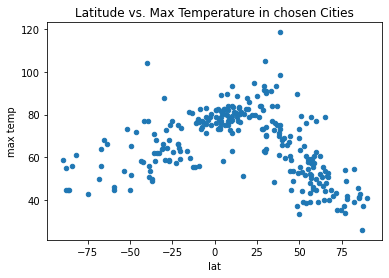

In [16]:
a = cleancities_df.plot.scatter(x="lat", y="max temp").get_figure()
plt.title("Latitude vs. Max Temperature in chosen Cities")
a.savefig("..\\Output\\latvsmaxtemp.png")
plt.show()

### This scatter plot makes the most sense to me. We can notice how temperature increases the closer we move to the Equator.

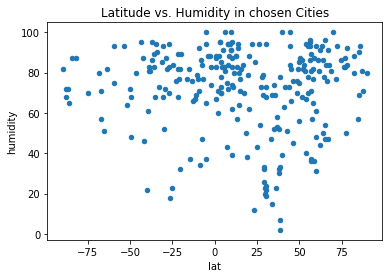

In [17]:
b= cleancities_df.plot.scatter(x="lat", y="humidity").get_figure()
plt.title("Latitude vs. Humidity in chosen Cities")
b.savefig("..\\Output\\latvshumid.png")
plt.show()

### Humidity and Latitude seems a little random. I'd believe that a city would be more humid if it was closer to the ocean. Or maybe it depends on the amount of vegetation there is there.

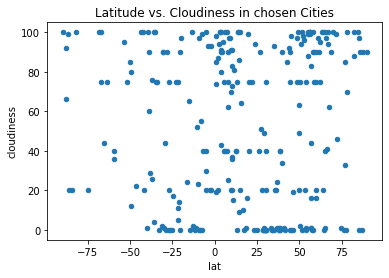

In [18]:
c=cleancities_df.plot.scatter(x="lat", y="cloudiness").get_figure()
plt.title("Latitude vs. Cloudiness in chosen Cities")
c.savefig("..\\Output\\latvscloud.png")
plt.show()

### There doesn't appear to be anything noticeable in this scatter plot.

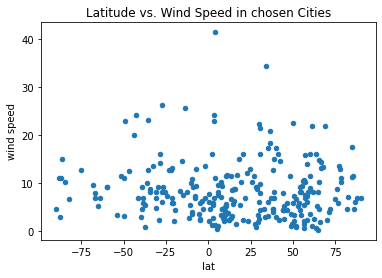

In [19]:
d=cleancities_df.plot.scatter(x="lat", y="wind speed").get_figure()
plt.title("Latitude vs. Wind Speed in chosen Cities")
d.savefig("..\\Output\\latvswind.png")
plt.show()

### We can see that the cities that were chosen are not that windy. Maybe if we plotted altitude along with latitude and wind speed, we could see another kind of pattern.

# Now lets makes regressions comparing the Northern and Southern Hemisphere

In [20]:
import scipy.stats as st
from scipy.stats import linregress

In [21]:
northhem = cleancities_df.loc[cleancities_df["lat"]>=0]
southhem = cleancities_df.loc[cleancities_df["lat"]<0]

northhem.dropna(inplace=True)
southhem.dropna(inplace=True)

<ipython-input-21-4312184d1897>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  northhem.dropna(inplace=True)
<ipython-input-21-4312184d1897>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  southhem.dropna(inplace=True)


In [22]:
def regression(x_values, y_values, x_label, y_label, eq_pos, save):
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
    regress_values = x_values * slope + intercept
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    plt.scatter(x_values,y_values)
    plt.plot(x_values,regress_values,"r-")
    plt.annotate(line_eq,(eq_pos),fontsize=15,color="red")
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(f"{save}")
    print(f"The r-squared is: {rvalue**2}")
    plt.savefig(f"..\\Output\\{save}")
    plt.show()

The r-squared is: 0.5677006734202428


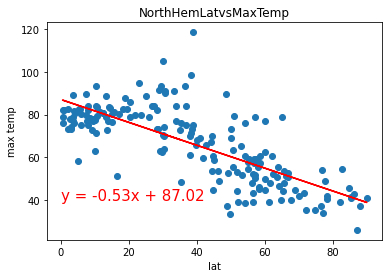

In [23]:
x_label = "lat"
y_label = "max temp"

eq_pos = (0,40)

regression(northhem[x_label], northhem[y_label], x_label, y_label, eq_pos, "NorthHemLatvsMaxTemp")

The r-squared is: 0.3447784682863659


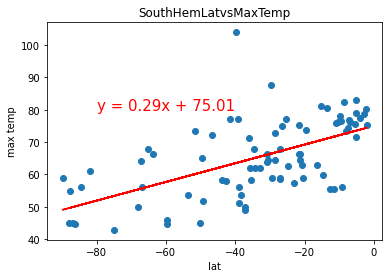

In [24]:
x_label = "lat"
y_label = "max temp"

eq_pos = (-80,80)

regression(southhem[x_label], southhem[y_label], x_label, y_label, eq_pos, "SouthHemLatvsMaxTemp")

The r-squared is: 1.7327639241970638e-05


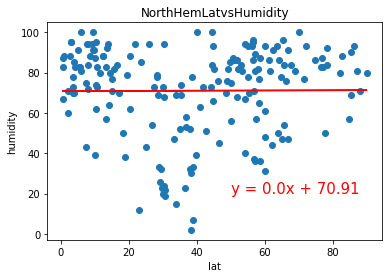

In [25]:
x_label = "lat"
y_label = "humidity"

eq_pos = (50,20)

regression(northhem[x_label], northhem[y_label], x_label, y_label, eq_pos, "NorthHemLatvsHumidity")

The r-squared is: 0.0003254677992236528


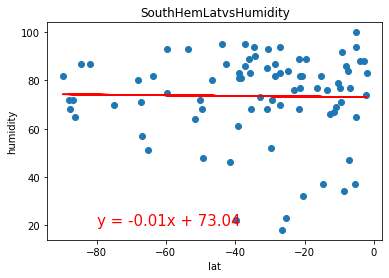

In [26]:
x_label = "lat"
y_label = "humidity"

eq_pos = (-80,20)

regression(southhem[x_label], southhem[y_label], x_label, y_label, eq_pos, "SouthHemLatvsHumidity")

The r-squared is: 0.0008843378171479677


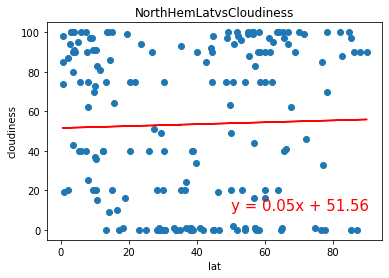

In [27]:
x_label = "lat"
y_label = "cloudiness"

eq_pos = (50,10)

regression(northhem[x_label], northhem[y_label], x_label, y_label, eq_pos, "NorthHemLatvsCloudiness")

The r-squared is: 0.07118533173274112


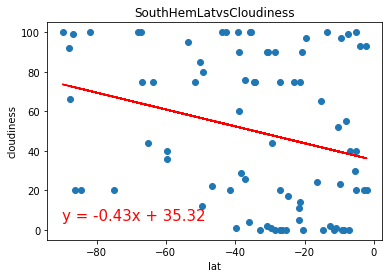

In [28]:
x_label = "lat"
y_label = "cloudiness"

eq_pos = (-90,5)

regression(southhem[x_label], southhem[y_label], x_label, y_label, eq_pos, "SouthHemLatvsCloudiness")

The r-squared is: 0.00136386170808038


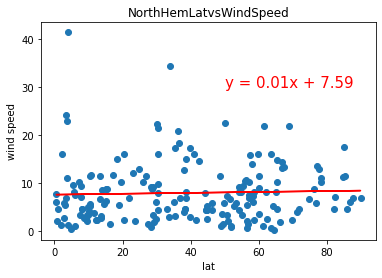

In [29]:
x_label = "lat"
y_label = "wind speed"

eq_pos = (50,30)

regression(northhem[x_label], northhem[y_label], x_label, y_label, eq_pos, "NorthHemLatvsWindSpeed")

The r-squared is: 0.007255661088078267


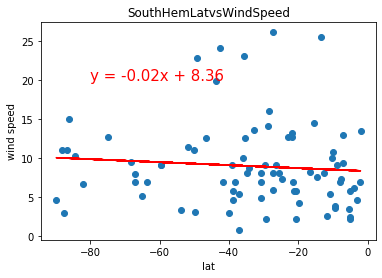

In [30]:
x_label = "lat"
y_label = "wind speed"

eq_pos = (-80,20)

regression(southhem[x_label], southhem[y_label], x_label, y_label, eq_pos, "SouthHemLatvsWindSpeed")

# Observations:

## 1. Temperature is affected by how close you are to the Equator.

## 2. Wind Speed tends to increase the farther away your are from the Equator.

## 3. Cloudiness tends to increase the farther away you are from the Equator.